# Importing needed modules

In [8]:
import os
import requests
import torch

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from transformers import Owlv2Processor, Owlv2ForObjectDetection
from PIL import Image

# Function to visualize the final result of the model

In [9]:
def plot_results(results, texts, image):
    """
    Plots the results of object detection on an image.
    
    Args:
        results (list): List of dictionaries containing the detected object information.
        texts (list): List of text labels corresponding to the detected objects.
        image (PIL.JpegImagePlugin.JpegImageFile): The input image on which the objects are detected.
    """
    boxes, scores, labels = results[0]["boxes"], results[0]["scores"], results[0]["labels"]
    text = texts[0]
    colors = np.random.random((len(text),3))
    fig, ax = plt.subplots()
    ax.imshow(image)

    # Iteration on every boxes, scores and labels
    for box, score, label in zip(boxes, scores, labels):
        box = [round(i, 2) for i in box.detach().numpy()]
        
        # Convertion of the coordinates of the box for Matplotlib (x, y, width, length)
        x, y, xmax, ymax = box
        rect = patches.Rectangle((x, y), xmax - x, ymax - y, linewidth=1, edgecolor=colors[label], facecolor='none')
        
        ax.add_patch(rect)
        plt.text(x, y - 10, f'{text[label]}: {round(score.item(), 2)}', color='white', fontsize=8, backgroundcolor=colors[label])
        
        print(f"Detected {text[label]} with confidence {round(score.item(), 3)} at location {box}")
   
    plt.axis('off')
    plt.show()


# Loading the two needed models

In [10]:
processor = Owlv2Processor.from_pretrained("google/owlv2-base-patch16-ensemble")
model = Owlv2ForObjectDetection.from_pretrained("google/owlv2-base-patch16-ensemble")

# Prediction with the models

In [14]:
path = "/home/omilab-gpu/OWLv2-For_SAP_scenes_recognition/data/iLoveIMG IMG 6542.jpg"
image = Image.open(path)
texts = [["businessmen figure", "oldwomen front","Bus figure"]]
inputs = processor(text=texts, images=image, return_tensors="pt")
outputs = model(**inputs)

# Target image sizes (height, width) to rescale box predictions [batch_size, 2]
target_sizes = torch.Tensor([image.size[::-1]])
# Convert outputs (bounding boxes and class logits) to Pascal VOC Format (xmin, ymin, xmax, ymax)
results = processor.post_process_object_detection(outputs=outputs, target_sizes=target_sizes, threshold=0.1)

# Ploting results

In [15]:
results

[{'scores': tensor([0.6551, 0.1242, 0.1231], grad_fn=<IndexBackward0>),
  'labels': tensor([2, 2, 2]),
  'boxes': tensor([[1340.9581,  431.4120, 3667.4026, 1173.3384],
          [1349.8923,  440.6101, 3647.0598, 1054.1322],
          [2243.3862,  446.4868, 3646.0198, 1043.5438]],
         grad_fn=<IndexBackward0>)}]

Detected Bus figure with confidence 0.655 at location [1340.96, 431.41, 3667.4, 1173.34]
Detected Bus figure with confidence 0.124 at location [1349.89, 440.61, 3647.06, 1054.13]
Detected Bus figure with confidence 0.123 at location [2243.39, 446.49, 3646.02, 1043.54]


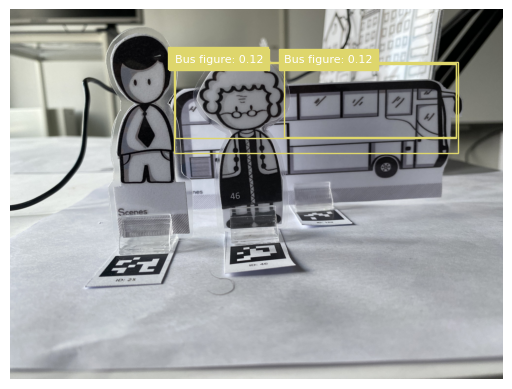

In [16]:
plot_results(results, texts, image)

# Generate dataset

In [33]:
images_directory = "./data/images/"
labels_directory = "./data/labels/"

images_files = os.listdir(images_directory)
labels_files = os.listdir(labels_directory)

dataset = []

for i, image_file in enumerate(images_files):
    image = Image.open(images_directory + image_file)
    label_file = open(labels_directory + image_file.split(".")[0] + ".txt", "r")
    
    label_content = label_file.read().splitlines()[0].split(" ")
    
    label = [float(label)  for label in label_content]
    
    dataset.append({"image_id" : i, "image" : image , "width" : image.width, "height" : image.height, "object" : {"bbox" : [label[1:]], "label" : [int(label[0])], "area" : [0]}})

dataset

[{'image_id': 0,
  'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x480>,
  'width': 640,
  'height': 480,
  'object': {'bbox': [[0.739063, 0.65625, 0.146875, 0.416667]],
   'label': [0],
   'area': [0]}},
 {'image_id': 1,
  'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x480>,
  'width': 640,
  'height': 480,
  'object': {'bbox': [[0.476562, 0.588542, 0.18125, 0.422917]],
   'label': [0],
   'area': [0]}},
 {'image_id': 2,
  'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x480>,
  'width': 640,
  'height': 480,
  'object': {'bbox': [[0.313281, 0.4125, 0.170313, 0.516667]],
   'label': [0],
   'area': [0]}},
 {'image_id': 3,
  'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x480>,
  'width': 640,
  'height': 480,
  'object': {'bbox': [[0.494531, 0.569792, 0.114063, 0.28125]],
   'label': [0],
   'area': [0]}},
 {'image_id': 4,
  'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x480>,
  'width

In [1]:
from transformers import Owlv2ImageProcessor, Owlv2ForObjectDetection


/home/omilab-gpu/OWLv2-For_SAP_scenes_recognition/.venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
processor = Owlv2ImageProcessor.from_pretrained("google/owlv2-base-patch16-ensemble")
